In [2]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
data = pd.read_csv(url)

In [8]:
data.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Donated_blood']

In [9]:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Recency          0
Frequency        0
Monetary         0
Time             0
Donated_blood    0
dtype: int64


In [10]:
print("\nTarget Distribution:\n", data['Donated_blood'].value_counts())


Target Distribution:
 Donated_blood
0    570
1    178
Name: count, dtype: int64


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_19484\3517511971.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Donated_blood', data=data, palette='viridis')


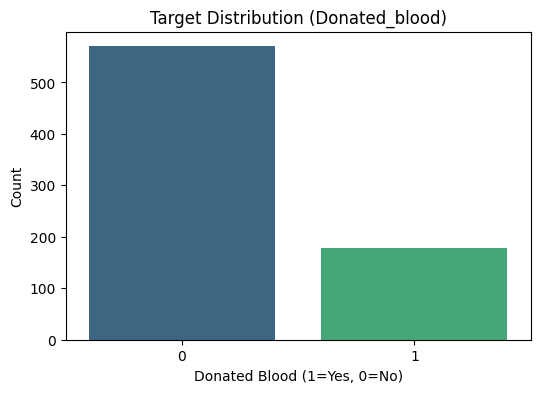

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Donated_blood', data=data, palette='viridis')
plt.title('Target Distribution (Donated_blood)')
plt.xlabel('Donated Blood (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

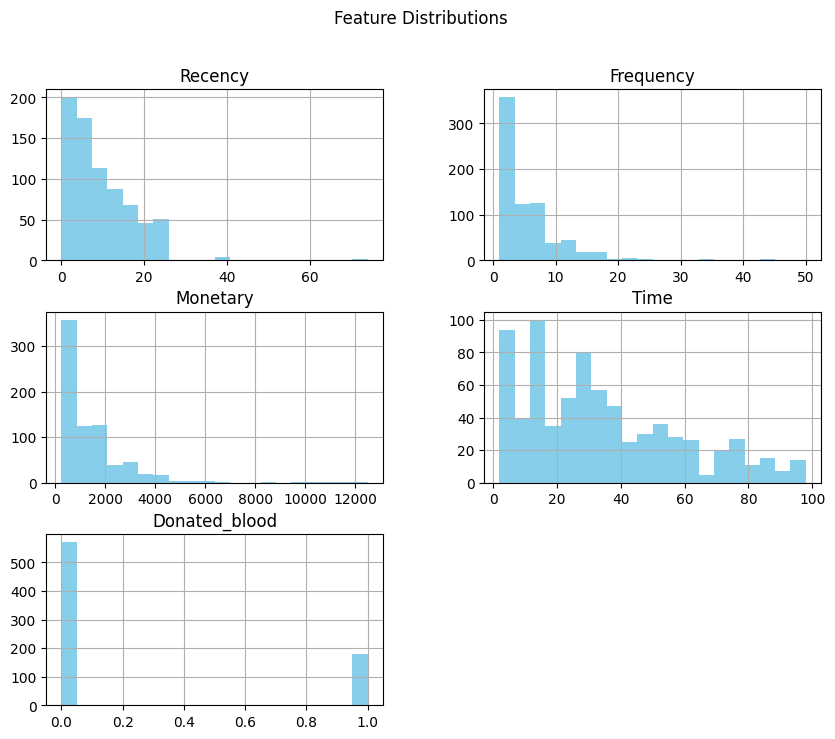

In [13]:
data.hist(figsize=(10, 8), bins=20, color='skyblue')
plt.suptitle('Feature Distributions')
plt.show()

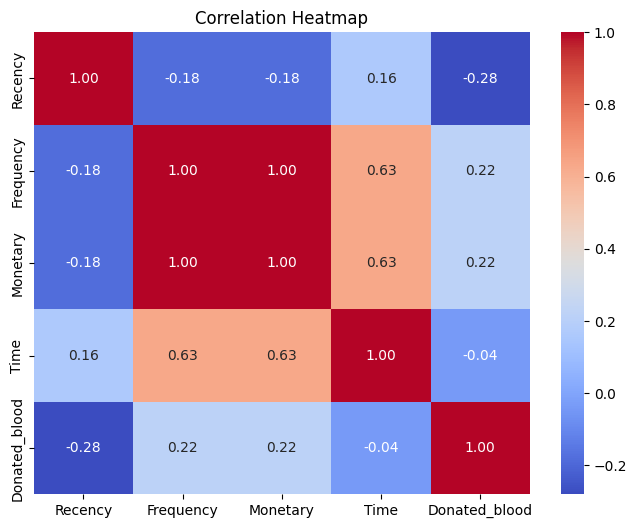

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [16]:
X = data[['Recency', 'Frequency', 'Monetary', 'Time']]
y = data['Donated_blood']

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
results = {}

In [21]:
start_time = time.time()
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
train_time_nb = time.time() - start_time

In [22]:
start_time = time.time()
nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)[:, 1]
test_time_nb = time.time() - start_time

In [23]:
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_loss = log_loss(y_test, nb_pred_proba)
results['Naive Bayes'] = {
    'Accuracy': nb_accuracy,
    'Loss': nb_loss,
    'Train Time': train_time_nb,
    'Test Time': test_time_nb
}

In [24]:
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
train_time_rf = time.time() - start_time

In [25]:
start_time = time.time()
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]
test_time_rf = time.time() - start_time

In [26]:
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_loss = 1 - rf_accuracy
results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Loss': rf_loss,
    'Train Time': train_time_rf,
    'Test Time': test_time_rf
}

In [44]:
start_time = time.time()
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
train_time_lr = time.time() - start_time

In [46]:
start_time = time.time()
lr_pred = lr_model.predict(X_test) 
lr_pred_proba = lr_model.predict_proba(X_test)[:, 1]  
test_time_lr = time.time() - start_time

In [48]:
lr_log_loss = log_loss(y_test, lr_pred_proba)  
lr_log_loss_pred = (lr_pred_proba >= 0.5).astype(int)
lr_loss_accuracy = accuracy_score(y_test, lr_log_loss_pred)
results['Logistic Regression'] = {
    'Accuracy': lr_loss_accuracy,
    'Loss': lr_log_loss,
    'Train Time': train_time_lr,
    'Test Time': test_time_lr
}

In [50]:
start_time = time.time()
nb_model = GaussianNB()
lr_model = LogisticRegression()
voting_model = VotingClassifier(estimators=[
    ('Logistic Regression', lr_model),
    ('Naive Bayes', nb_model),
    ('Random Forest', rf_model)
], voting='soft')

voting_model.fit(X_train, y_train)
train_time_voting = time.time() - start_time

In [52]:
start_time = time.time()
voting_pred = voting_model.predict(X_test)
voting_pred_proba = voting_model.predict_proba(X_test)[:, 1]
test_time_voting = time.time() - start_time

In [54]:
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_log_loss = log_loss(y_test, voting_pred_proba)
voting_mse = mean_squared_error(y_test, voting_pred_proba)
voting_mae = mean_absolute_error(y_test, voting_pred_proba)
results['Voting Classifier'] = {
    'Accuracy': voting_accuracy,
    'Log Loss': voting_log_loss,
    'MSE loss': voting_mse,
    'MAE Loss': voting_mae,
    'Train Time': train_time_voting,
    'Test Time': test_time_voting
}

In [56]:
print("Model Performance Summary:")
for model, metrics in results.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

Model Performance Summary:

Naive Bayes:
  Accuracy: 0.7533
  Loss: 0.6103
  Train Time: 0.0050
  Test Time: 0.0050

Random Forest:
  Accuracy: 0.7267
  Loss: 0.2733
  Train Time: 0.1653
  Test Time: 0.0181

Logistic Regression:
  Accuracy: 0.7600
  Loss: 0.4839
  Train Time: 0.0131
  Test Time: 0.0015

Voting Classifier:
  Accuracy: 0.7600
  Log Loss: 0.5171
  MSE loss: 0.1690
  MAE Loss: 0.3026
  Train Time: 0.2367
  Test Time: 0.0221


In [58]:
best_model = max(results, key=lambda x: results[x]['Accuracy'])
print(f"\nBest Model: {best_model}")
print("\nClassification Report:")
if best_model == 'Naive Bayes':
    print(classification_report(y_test, nb_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, nb_pred))
elif best_model == 'Random Forest':
    print(classification_report(y_test, rf_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, rf_pred))
elif best_model == 'XGBoost':
    print(classification_report(y_test, xgb_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, xgb_pred))
else:
    print(classification_report(y_test, voting_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, voting_pred))


Best Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       113
           1       0.54      0.19      0.28        37

    accuracy                           0.76       150
   macro avg       0.66      0.57      0.57       150
weighted avg       0.72      0.76      0.71       150


Confusion Matrix:
[[107   6]
 [ 30   7]]
